In [ ]:
import os
import pandas as pd

def load_data():
    data_dir = "../data/raw"
    csv_files = [
        f for f in os.listdir(data_dir)
        if f.endswith(".csv")
    ]
    datasets = {}
    for file in csv_files:
        path = os.path.join(data_dir,file)
        df = pd.read_csv(path, low_memory=False)
        df.columns = df.columns.str.strip()
        datasets[file] = df
    return datasets

In [27]:
import numpy as np

def dataset_overview(name, df):
    print("-"*50)
    print(f"{name}")
    print(f"Shape: {df.shape}")
    print(df.columns)
    print("\nLabel distribution")
    print(df["Label"].value_counts())

    nan_count = df.isna().sum().sum()
    inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
    print(f"\nNaN values: {nan_count}")
    print(f"\nInfinite values: {inf_count}")


--------------------------------------------------
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Shape: (225745, 79)
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Le

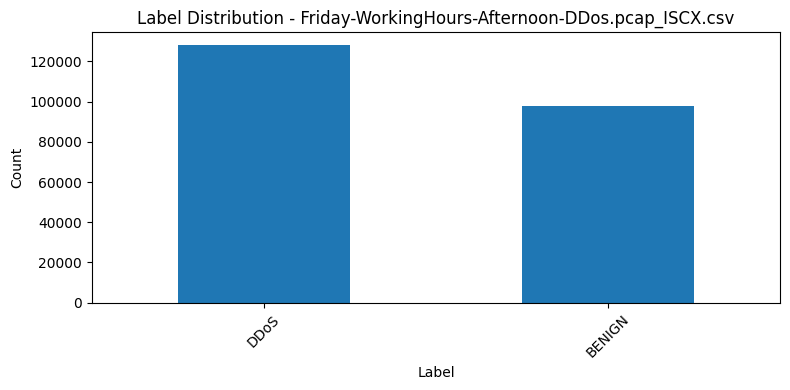

In [28]:
import matplotlib.pyplot as plt 

def plot_label_distribution(name, df):
    label_counts = df["Label"].value_counts()

    plt.figure(figsize=(8,4))
    label_counts.plot(kind="bar")
    plt.title(f"Label Distribution - {name}")
    plt.ylabel("Count")
    plt.xlabel("Label")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
name = "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
datasets = load_data()
dataset_overview(name,datasets[name])
plot_label_distribution(name,datasets[name])

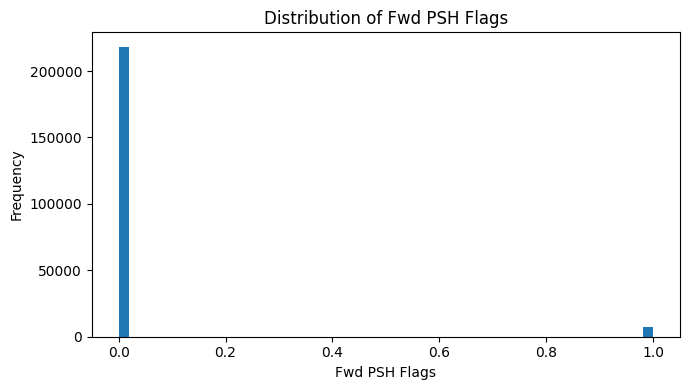

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_distribution(df, feature, bins=50, log=True):
    if feature not in df.columns:
        raise ValueError(f"Feature '{feature}' not found")

    data = df[feature].replace([np.inf, -np.inf], np.nan).dropna()

    if log:
        data = np.log1p(data)
        xlabel = f"log(1 + {feature})"
    else:
        xlabel = feature

    min_val, max_val = data.min(), data.max()

    plt.figure(figsize=(7, 4))
    plt.hist(data, bins=bins, range=(min_val, max_val))
    plt.title(f"Distribution of {feature}")
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


plot_feature_distribution(datasets[name], "Fwd PSH Flags",log=False)

Column consistency check
* All the 8 files have the same structure

In [38]:
from pathlib import Path

data_dir = Path("../data/raw")

def check_column_consistency():
    column_sets = {}
    datasets = load_data()

    for key in datasets.keys():
        df = datasets[key]
        df.columns = df.columns.str.strip()
        column_sets[key] = set(df.columns)
    reference_file = list(datasets.keys())[0]
    reference_columns = column_sets[reference_file]

    print(f"\nReference file: {reference_file}")
    print(f"\nNumber of columns: {len(reference_columns)}")

    for file, cols in column_sets.items():
        missing = reference_columns - cols
        extra = cols - reference_columns
        if missing or extra:
            print(f"Schema difference found in: {file}")
            if missing:
                print(f"  Missing columns: {sorted(missing)}")
            if extra:
                print(f"  Extra columns: {sorted(extra)}")
            print()
        else:
            print(f"{file} matches reference schema")
check_column_consistency()


Reference file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

Number of columns: 79
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv matches reference schema
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv matches reference schema
Friday-WorkingHours-Morning.pcap_ISCX.csv matches reference schema
Monday-WorkingHours.pcap_ISCX.csv matches reference schema
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv matches reference schema
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv matches reference schema
Tuesday-WorkingHours.pcap_ISCX.csv matches reference schema
Wednesday-workingHours.pcap_ISCX.csv matches reference schema


File-Level statistics

In [43]:
def compute_file_statistics():
    stats = []
    datasets = load_data()

    for key in datasets.keys():
        df = datasets[key]
        df.columns = df.columns.str.strip()

        rows, features = df.shape
        label_counts = df["Label"].value_counts()
        benign_count = label_counts.get("BENIGN",0)
        attack_count = rows - benign_count
        benign_pct = (benign_count/rows) * 100
        attack_pct = (attack_count/rows) * 100
        nan_count = df.isna().sum().sum()
        inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()

        stats.append({
            "File" : key,
            "Rows": rows,
            "Features": features,
            "percentage Benign": round(benign_pct,2),
            "percentage Attacks": round(attack_pct, 2),
            "NaN Count": nan_count,
            "Inf Count": inf_count
        })
    stats_df = pd.DataFrame(stats)
    stats_df.to_latex(
    "../reports/file_level_statistics.tex",
    index=False,
    caption="File-level statistics of the CIC-IDS-2017 dataset",
    label="tab:file_level_stats")
    return stats_df
stats_df = compute_file_statistics()
stats_df


,File,Rows,Features,percentage Benign,percentage Attacks,NaN Count,Inf Count
0,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv,225745,79,43.29,56.71,4,64
1,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...,286467,79,44.52,55.48,15,727
2,Friday-WorkingHours-Morning.pcap_ISCX.csv,191033,79,98.97,1.03,28,216
3,Monday-WorkingHours.pcap_ISCX.csv,529918,79,100.00,0.00,64,810
4,Thursday-WorkingHours-Afternoon-Infilteration....,288602,79,99.99,0.01,18,396
5,Thursday-WorkingHours-Morning-WebAttacks.pcap_...,170366,79,98.72,1.28,20,250
6,Tuesday-WorkingHours.pcap_ISCX.csv,445909,79,96.90,3.10,201,327
7,Wednesday-workingHours.pcap_ISCX.csv,692703,79,63.52,36.48,1008,1586


Label distribution

In [44]:
def label_distribution_per_file(datasets):
    records = []
    for name, df in datasets.items():
        label_counts = df["Label"].value_counts()
        for label, count in label_counts.items():
            records.append({
                "File": name,
                "Label": label,
                "Count": count
            })
    df = pd.DataFrame(records)
    df.to_latex(
    "../reports/label_distribution_per_file.tex",
    index=False,
    caption="File-level label distribution of the CIC-IDS-2017 dataset",
    label="tab:file_level_label_distribution")
    return df

label_per_file_df = label_distribution_per_file(datasets)
label_per_file_df.head()
        

,File,Label,Count
0,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv,DDoS,128027
1,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv,BENIGN,97718
2,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...,PortScan,158930
3,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...,BENIGN,127537
4,Friday-WorkingHours-Morning.pcap_ISCX.csv,BENIGN,189067


Aggregated label distribution

In [45]:
def aggregate_label_distribution(datasets):
    all_labels = []

    for df in datasets.values():
        all_labels.append(df["Label"])
    all_labels = pd.concat(all_labels)
    return all_labels.value_counts()
global_label_counts = aggregate_label_distribution(datasets)
global_label_counts

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [46]:
def binary_label_distribution(label_counts):
    benign = label_counts.get("BENIGN", 0)
    attacks = label_counts.sum() - benign

    return pd.Series({
        "BENIGN": benign,
        "ATTACK": attacks
    })

binary_global_labels = binary_label_distribution(global_label_counts)
binary_global_labels

BENIGN    2273097
ATTACK     557646
dtype: int64

In [53]:
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title, log_scale=False):
    plt.figure(figsize=(7,4))
    labels.plot(kind="bar")
    
    if log_scale:
        plt.yscale("log")
        plt.ylabel("Log Count")
    else:
        plt.ylabel("Count")

    plt.title(title)
    plt.xlabel("Label")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

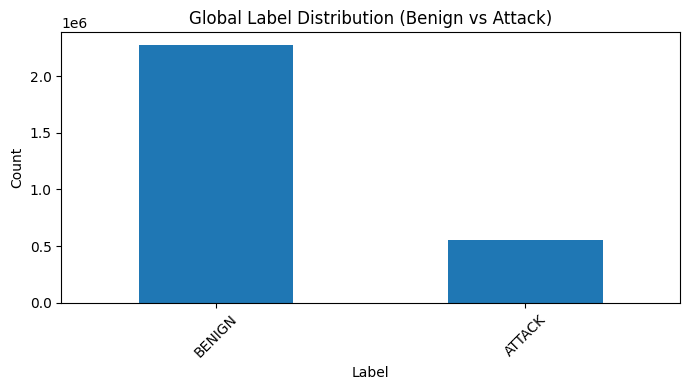

In [54]:
plot_label_distribution(
    binary_global_labels,
    title="Global Label Distribution (Benign vs Attack)"
)

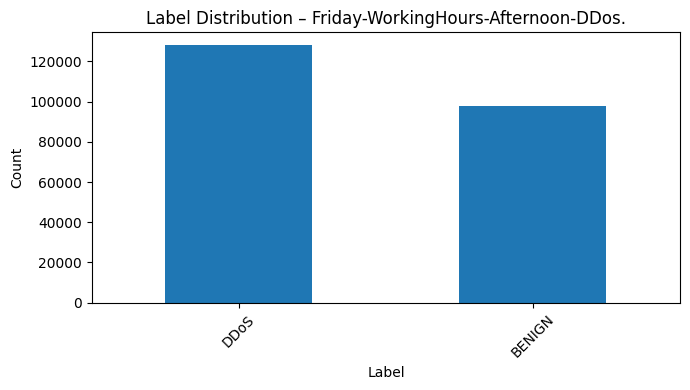

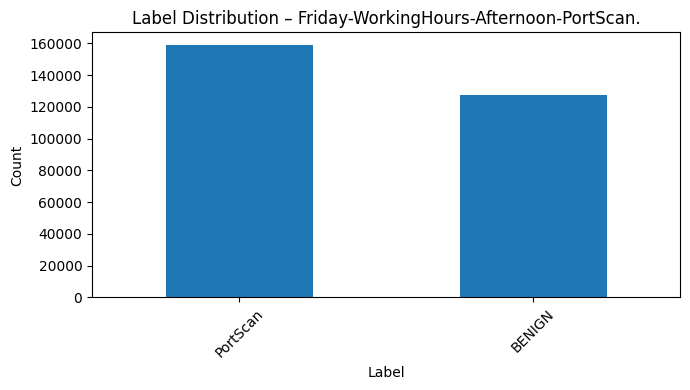

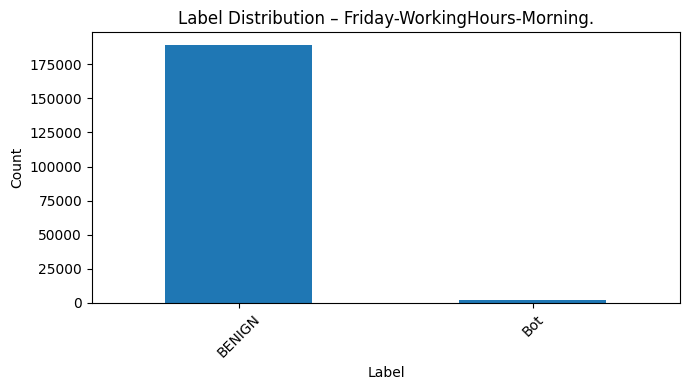

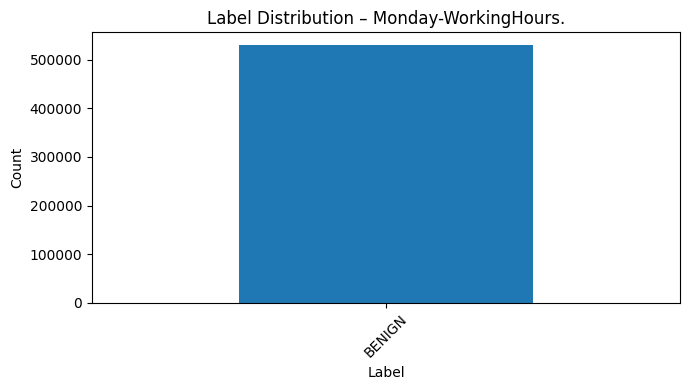

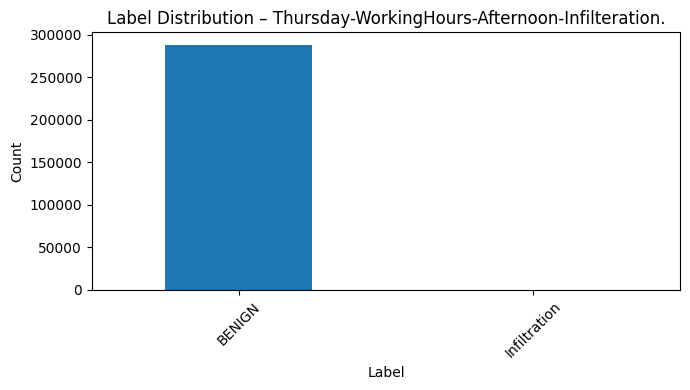

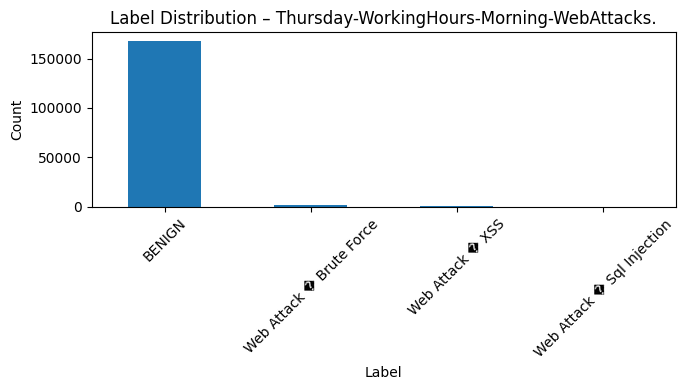

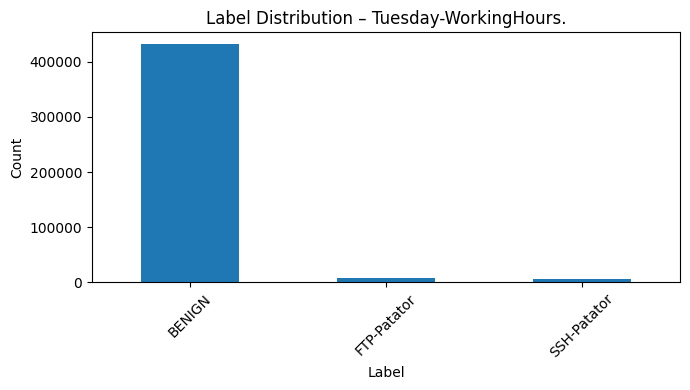

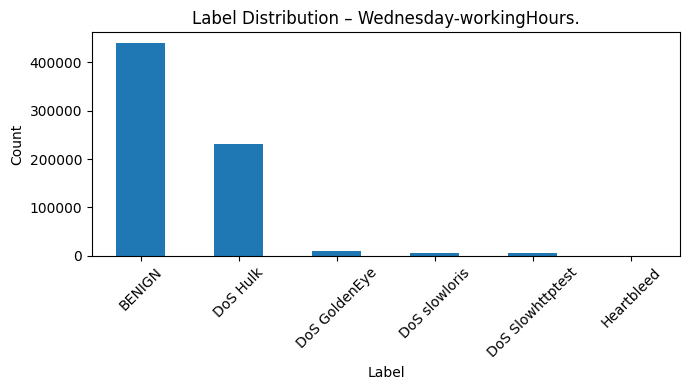

In [56]:
names = datasets.keys()
for name in names :
    plot_label_distribution(
        datasets[name]["Label"].value_counts(),
        title=f"Label Distribution – {name.replace("pcap_ISCX.csv","")}"
    )